In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("final_economy.csv")
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,4,1408,2,2,2,5,5,130.0,1,5953
1,4,1387,2,1,2,4,5,140.0,1,5953
2,1,1213,2,1,2,1,5,130.0,1,5956
3,5,1559,2,4,2,0,5,135.0,1,5955
4,5,1549,2,4,2,4,5,140.0,1,5955


In [4]:
## Splitting the data into dependent and independent variables
X = df.drop('price', axis=1)
y = df['price']

In [5]:
X.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
0,4,1408,2,2,2,5,5,130.0,1
1,4,1387,2,1,2,4,5,140.0,1


<Axes: xlabel='price', ylabel='Density'>

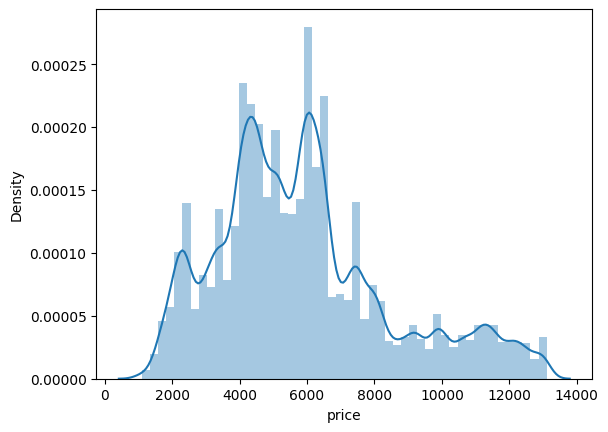

In [6]:
import seaborn as sns
sns.distplot(y, kde=True)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=43)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((163979, 9), (163979,), (28938, 9), (28938,))

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
def score(actual, pred):
    print("RMSE : ", mean_squared_error(actual, pred)**0.5)
    print("R2: ", r2_score(actual, pred))

In [12]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
score(y_test, nb_pred)

RMSE :  2449.3152146607304
R2:  0.11140921665916026


In [13]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn = KNN(n_neighbors=10)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
score(y_test, knn_pred)

RMSE :  1189.008584152733
R2:  0.7905972291988427


In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
score(y_test, lr_pred)

RMSE :  1988.5239738955713
R2:  0.4143015073365669


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=120)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
score(y_test, rf_pred)

RMSE :  716.744486878653
R2:  0.9239076203660859


In [16]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)
ab_pred = ab.predict(X_test)
score(y_test, ab_pred)

RMSE :  1729.4855272424772
R2:  0.5569565625507491


In [ ]:
## Random forest worked well here.
## Saving this model

In [33]:
import pickle
pickle.dump(rf, open('/content/drive/MyDrive/FCode/economy_model.pkl', 'wb'))
print("Done")

Done


### Business Model

In [102]:
bs = pd.read_csv('final_business.csv')
bs.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,0,873,2,2,2,2,5,120.0,1,25612
1,0,791,2,2,2,5,5,135.0,1,25612
2,0,758,2,2,1,5,5,1485.0,1,42220
3,0,867,2,5,1,5,5,1590.0,1,44450
4,0,766,2,2,1,5,5,400.0,1,46690


In [103]:
bs.shape

(92210, 10)

In [104]:
X = bs.drop('price', axis=1)
y = bs['price']
X.shape, y.shape

((92210, 9), (92210,))

In [105]:
bs.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
duration            0
days_left           0
price               0
dtype: int64

<Axes: xlabel='price', ylabel='Density'>

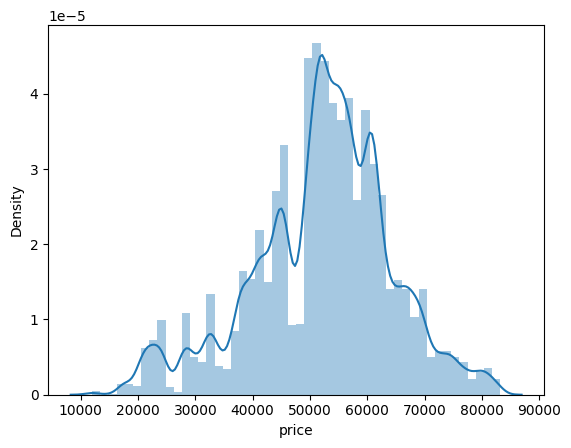

In [106]:
sns.distplot(y)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=43)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((76361, 9), (76361,), (13476, 9), (13476,))

In [100]:
bs_rf = RandomForestRegressor(n_estimators=100, verbose=1)
bs_rf.fit(X_train, y_train)
bs_rf_pred = bs_rf.predict(X_test)
score(y_test, bs_rf_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   28.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE :  3297.844577847545
R2:  0.9136487780652669


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [107]:
pickle.dump(bs_rf, open('/content/drive/MyDrive/FCode/business_model.pkl', 'wb'))